In [1]:
import pandas as pd
import pdb
from lumina.genetic.metrics.ts_pnl import calculate_ful_ts_ret
import ultron.factor.empyrical as empyrical
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from kdutils.common import *
from kdutils.macro2 import *
from kdutils.data import fetch_main_market

In [3]:
instruments = 'ims'
strategy_settings = {
        'commission': COST_MAPPING[INSTRUMENTS_CODES[instruments]],
        'slippage': 0,
        'size': CONT_MULTNUM_MAPPING[INSTRUMENTS_CODES[instruments]]
    }

In [22]:
COST_MAPPING[INSTRUMENTS_CODES[instruments]]

0.00012

In [4]:
returns = pd.read_parquet('records/pred_alpha_cta.parquet')
returns['trade_time'] = pd.to_datetime(
            returns['date'].astype(str) + ' ' + returns['minTime'].astype(str)
        )
returns['trade_time'] = pd.to_datetime(returns['trade_time'])
returns['code']='IM'
returns = returns[['trade_time','ret_15']].rename(columns={'ret_15':'IM'}).set_index('trade_time')

In [5]:
data = pd.read_feather('_bak/20250905/test.feat')
begin_date ='2023-12-10' #data['trade_time'].min().strftime('%Y-%m-%d %H:%M:%S')
end_date = '2024-04-10'#data['trade_time'].max().strftime('%Y-%m-%d %H:%M:%S')
print(begin_date,end_date)

2023-12-10 2024-04-10


In [6]:
market_data = fetch_main_market(begin_date=begin_date,
                             end_date=end_date,
                             codes=['IM'])

In [7]:
market_data_indexed = market_data.set_index('trade_time')
aggregation_rules = {
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum',
        'value': 'sum'
    }
market_data_15min = market_data_indexed.resample('15T', label='right', closed='right').agg(aggregation_rules)
market_data_15min.dropna(inplace=True)
market_data_15min.reset_index(inplace=True)
market_data_15min['code']='IM'
market_data_15min

,trade_time,open,high,low,close,volume,value,code
0,2023-12-11 09:30:00,6326.207382,6326.207382,6326.207382,6326.207382,90.0,1.075140e+08,IM
1,2023-12-11 09:45:00,6328.325650,6333.621320,6286.383944,6313.921428,10447.0,1.245244e+10,IM
2,2023-12-11 10:00:00,6314.980562,6329.384784,6311.591333,6320.911712,3435.0,4.099452e+09,IM
3,2023-12-11 10:15:00,6321.970846,6329.172957,6312.862294,6322.182673,3268.0,3.901289e+09,IM
4,2023-12-11 10:30:00,6322.182673,6332.562186,6316.675176,6324.300941,2618.0,3.126706e+09,IM
...,...,...,...,...,...,...,...,...
1338,2024-04-10 14:00:00,5864.240307,5864.682307,5840.593286,5855.179299,6400.0,6.781818e+09,IM
1339,2024-04-10 14:15:00,5855.179299,5874.848317,5850.096294,5856.505300,5144.0,5.458858e+09,IM
1340,2024-04-10 14:30:00,5856.505300,5894.296334,5845.676290,5892.970333,5544.0,5.895913e+09,IM
1341,2024-04-10 14:45:00,5892.970333,5915.291353,5888.329329,5897.169337,5987.0,6.395983e+09,IM


In [8]:
market_data['vwap'] = market_data['value'] / market_data['volume'] / 200
market_data.head()

,close,high,low,open,value,volume,openint,chg,code,pcr_cumfactor,trade_time,price,contMultNum,listDate,vwap
0,6326.207382,6326.207382,6326.207382,6326.207382,1.075140e+08,90.0,84112.0,NaN,IM,1.059134,2023-12-11 09:30:00,6326.207382,200.0,2025-08-18,5973.000000
1,6314.980562,6333.621320,6307.566624,6328.325650,1.728675e+09,1448.0,83280.0,-0.001776,IM,1.059134,2023-12-11 09:31:00,6321.123539,200.0,2025-08-18,5969.180249
2,6297.610764,6313.497774,6292.950574,6313.497774,1.475880e+09,1240.0,82676.0,-0.002754,IM,1.059134,2023-12-11 09:32:00,6304.389222,200.0,2025-08-18,5951.127581
3,6291.255960,6300.364512,6287.866731,6298.881725,1.371512e+09,1154.0,82190.0,-0.001010,IM,1.059134,2023-12-11 09:33:00,6294.592232,200.0,2025-08-18,5942.427903
4,6298.881725,6301.423646,6286.383944,6289.137692,9.043965e+08,761.0,81815.0,0.001211,IM,1.059134,2023-12-11 09:34:00,6293.956752,200.0,2025-08-18,5942.158213


In [9]:
market_data.head()

,close,high,low,open,value,volume,openint,chg,code,pcr_cumfactor,trade_time,price,contMultNum,listDate,vwap
0,6326.207382,6326.207382,6326.207382,6326.207382,1.075140e+08,90.0,84112.0,NaN,IM,1.059134,2023-12-11 09:30:00,6326.207382,200.0,2025-08-18,5973.000000
1,6314.980562,6333.621320,6307.566624,6328.325650,1.728675e+09,1448.0,83280.0,-0.001776,IM,1.059134,2023-12-11 09:31:00,6321.123539,200.0,2025-08-18,5969.180249
2,6297.610764,6313.497774,6292.950574,6313.497774,1.475880e+09,1240.0,82676.0,-0.002754,IM,1.059134,2023-12-11 09:32:00,6304.389222,200.0,2025-08-18,5951.127581
3,6291.255960,6300.364512,6287.866731,6298.881725,1.371512e+09,1154.0,82190.0,-0.001010,IM,1.059134,2023-12-11 09:33:00,6294.592232,200.0,2025-08-18,5942.427903
4,6298.881725,6301.423646,6286.383944,6289.137692,9.043965e+08,761.0,81815.0,0.001211,IM,1.059134,2023-12-11 09:34:00,6293.956752,200.0,2025-08-18,5942.158213


In [10]:
market_data1 = market_data.set_index('trade_time')
temp_return2 = market_data1['vwap'].shift(-15) / market_data1['vwap'].shift(-1)-1
#data.reset_index().merge(return2, on=['trade_time'])
temp_return2 = temp_return2.reset_index()
temp_return2['trade_time'] = pd.to_datetime(temp_return2['trade_time'])
temp_return2['code']='IM'
temp_return2 = temp_return2[['trade_time','vwap']].rename(columns={'vwap':'IM'}).set_index('trade_time')
temp_return2 = temp_return2.reindex(returns.index)

In [11]:
temp_return2['IM'].corr(returns['IM'])

0.9989769423280686

In [12]:
returns.head()

,IM
trade_time,
2024-01-02 10:15:00,-0.000202
2024-01-02 10:30:00,0.000634
2024-01-02 10:45:00,-0.001118
2024-01-02 11:15:00,-0.001019
2024-01-02 13:30:00,0.000535


In [13]:
temp_return2.head()

,IM
trade_time,
2024-01-02 10:15:00,-0.000202
2024-01-02 10:30:00,0.000634
2024-01-02 10:45:00,-0.001118
2024-01-02 11:15:00,-0.001019
2024-01-02 13:30:00,0.000535


In [14]:
total_data = data.merge(market_data_15min, on=['trade_time'])
data = total_data[['trade_time','f_scaled']]
data = data.set_index(['trade_time'])
new_columns = pd.MultiIndex.from_tuples([('pos', 'IM')])
pos_data1 = data.copy()
pos_data1.columns = new_columns
market_data = total_data.drop(['f_scaled'],axis=1)
total_data2 = market_data_15min.set_index(['trade_time','code']).unstack()

In [15]:
df1 = calculate_ful_ts_ret(pos_data=pos_data1,
                                  total_data=total_data2,
                                  strategy_settings=strategy_settings,
                                  temp_returns=returns)
returns1 = df1['a_ret']

> /workspace/worker/env/lingua/lib/python3.8/site-packages/Finance_Lumina-0.3.5-py3.8-linux-x86_64.egg/lumina/genetic/metrics/ts_pnl.py(80)calculate_ful_ts_ret()
     78     pdb.set_trace()
     79     change = np.log(openD / openD.shift(1)).shift(-1).fillna(
---> 80         0)  if temp_returns is None else temp_returns# 当前期 看到 当前期到下一期的收益率 
     81 
     82     trade = (pos.diff()).fillna(0)



In [16]:
df2 = calculate_ful_ts_ret(pos_data=pos_data1,
                                  total_data=total_data2,
                                  strategy_settings=strategy_settings)
returns2 = df2['a_ret']

> /workspace/worker/env/lingua/lib/python3.8/site-packages/Finance_Lumina-0.3.5-py3.8-linux-x86_64.egg/lumina/genetic/metrics/ts_pnl.py(80)calculate_ful_ts_ret()
     78     pdb.set_trace()
     79     change = np.log(openD / openD.shift(1)).shift(-1).fillna(
---> 80         0)  if temp_returns is None else temp_returns# 当前期 看到 当前期到下一期的收益率 
     81 
     82     trade = (pos.diff()).fillna(0)



In [17]:
df3 = calculate_ful_ts_ret(pos_data=pos_data1,
                                  total_data=total_data2,
                                  strategy_settings=strategy_settings,
                                  temp_returns=temp_return2)
returns3 = df3['a_ret']

> /workspace/worker/env/lingua/lib/python3.8/site-packages/Finance_Lumina-0.3.5-py3.8-linux-x86_64.egg/lumina/genetic/metrics/ts_pnl.py(80)calculate_ful_ts_ret()
     78     pdb.set_trace()
     79     change = np.log(openD / openD.shift(1)).shift(-1).fillna(
---> 80         0)  if temp_returns is None else temp_returns# 当前期 看到 当前期到下一期的收益率 
     81 
     82     trade = (pos.diff()).fillna(0)



In [18]:
temp_return2

,IM
trade_time,
2024-01-02 10:15:00,-0.000202
2024-01-02 10:30:00,0.000634
2024-01-02 10:45:00,-0.001118
2024-01-02 11:15:00,-0.001019
2024-01-02 13:30:00,0.000535
...,...
2025-03-12 13:30:00,NaN
2025-03-12 13:45:00,NaN
2025-03-12 14:00:00,NaN


In [19]:
returns1.name = "cta"
returns2.name = "ori"
returns3.name = "return1"

In [20]:
returns2 = returns2.reindex(returns1.index)
returns3 = returns3.reindex(returns1.index)

<Axes: xlabel='trade_time'>

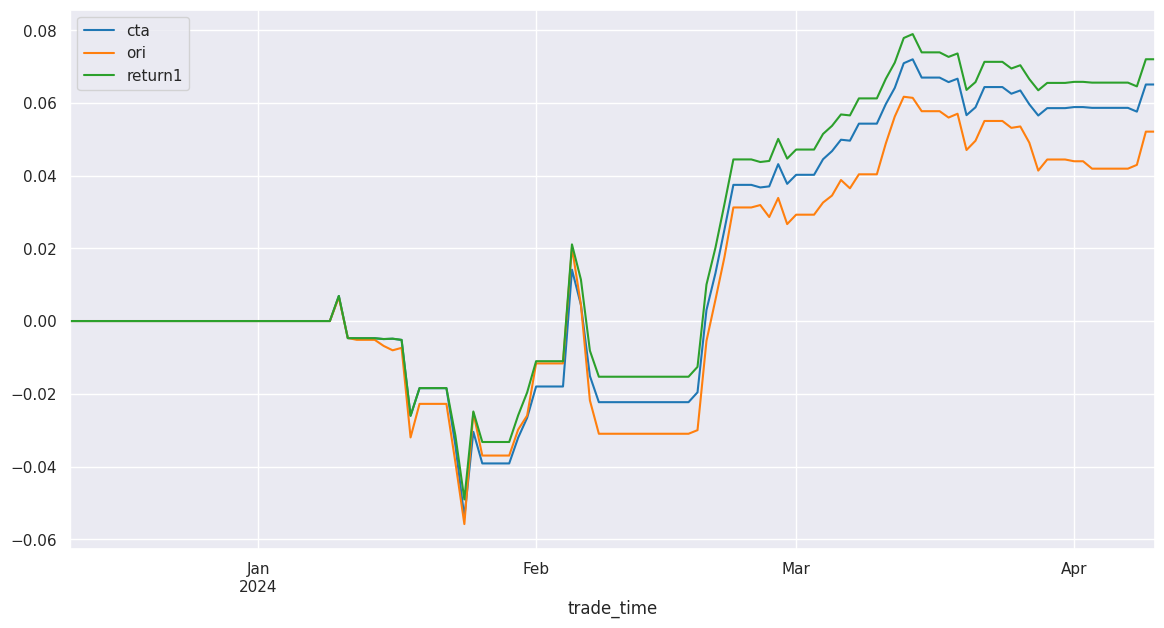

In [21]:
pd.concat([returns1,returns2,returns3],axis=1).dropna().loc[:'2025-03-13'].cumsum().plot(figsize=(14,7))

In [30]:
returns1.index

DatetimeIndex(['2023-12-11', '2023-12-12', '2023-12-13', '2023-12-14',
               '2023-12-15', '2023-12-16', '2023-12-17', '2023-12-18',
               '2023-12-19', '2023-12-20',
               ...
               '2025-03-04', '2025-03-05', '2025-03-06', '2025-03-07',
               '2025-03-08', '2025-03-09', '2025-03-10', '2025-03-11',
               '2025-03-12', '2025-03-13'],
              dtype='datetime64[ns]', name='trade_time', length=459, freq='D')

In [31]:
returns2.index

DatetimeIndex(['2023-12-11', '2023-12-12', '2023-12-13', '2023-12-14',
               '2023-12-15', '2023-12-16', '2023-12-17', '2023-12-18',
               '2023-12-19', '2023-12-20',
               ...
               '2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04',
               '2024-04-05', '2024-04-06', '2024-04-07', '2024-04-08',
               '2024-04-09', '2024-04-10'],
              dtype='datetime64[ns]', name='trade_time', length=122, freq='D')

In [32]:
returns3.index

DatetimeIndex(['2023-12-11', '2023-12-12', '2023-12-13', '2023-12-14',
               '2023-12-15', '2023-12-16', '2023-12-17', '2023-12-18',
               '2023-12-19', '2023-12-20',
               ...
               '2025-03-04', '2025-03-05', '2025-03-06', '2025-03-07',
               '2025-03-08', '2025-03-09', '2025-03-10', '2025-03-11',
               '2025-03-12', '2025-03-13'],
              dtype='datetime64[ns]', name='trade_time', length=459, freq='D')